### Predictions Using LGBM

In [1]:
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import matplotlib.pyplot as plt
import math

In [8]:
file_path = "/Users/mac/Desktop/Comapny2/CryptoPortfolioAI/artifacts/df_last_year_20250109.csv"
df_btc = preprocess_data(file_path, "BTC")
lgbm_metrics = LGBM_Model(df_btc)

print("Evaluation Metrics:", lgbm_metrics)

TypeError: preprocess_data() takes 1 positional argument but 2 were given

In [2]:
df3 = pd.read_csv("/Users/mac/Desktop/Comapny2/CryptoPortfolioAI/artifacts/df_last_year_20250109.csv")
df3.head()

,datetime,symbol,price,volume_24h,volume_change_24h,percent_change_1h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,market_cap,market_cap_dominance,fully_diluted_market_cap,circulating_supply,total_supply,date
0,2025-01-09 00:38:38,WAI,0.020860,1.020250e+06,0.0000,7.788221,12.335881,12.335881,12.335881,12.335881,12.335881,0.000000e+00,0.0000,2.086005e+07,0.000000e+00,1.000000e+09,2022-02-24
1,2025-01-09 00:38:38,ADA,0.924652,1.939491e+09,-6.0118,-2.424521,-8.537684,1.392174,-16.965305,110.523816,175.285419,3.250260e+10,0.9853,4.160936e+10,3.515115e+10,4.499512e+10,2022-02-24
2,2025-01-09 00:38:38,AVAX,37.299335,7.347442e+08,7.7448,-0.934974,-7.285825,1.592909,-23.843868,28.784312,46.534919,1.531036e+10,0.4641,2.669695e+10,4.104728e+08,4.488091e+08,2022-02-24
3,2025-01-09 00:38:38,BNB,691.104599,2.295891e+09,1.4070,-0.271765,-1.152902,-1.939567,-3.938155,12.218398,23.680743,9.952353e+10,3.0170,9.952353e+10,1.440065e+08,1.440065e+08,2022-02-24
4,2025-01-09 00:38:38,BTC,94469.951290,6.616604e+10,20.0372,-0.083482,-2.323822,0.338016,-2.981795,23.969996,58.575804,1.871205e+12,56.6557,1.983869e+12,1.980741e+07,1.980741e+07,2022-02-24


In [ ]:
df3 = df3.drop(columns=["symbol", "date"], inplace=True)

In [3]:
def preprocess_data(file_path, coin_name):
    # Load the CSV file
    df = pd.read_csv(file_path)

    # Filter for Bitcoin data
    df_btc = df[df["symbol"] == coin_name]
    df_btc = df_btc.drop(columns=["symbol", "datetime"])
    df_btc = df_btc.reset_index(drop=True)
    df_btc = df_btc.rename(columns={'date': 'ds', 'price': 'y'})
    
    # Set constant time '01:00:00' for all dates
    df_btc['ds'] = pd.to_datetime(df_btc['ds']).dt.date.astype(str) + " 12:00:00"
    df_btc['ds'] = pd.to_datetime(df_btc['ds'])  # Convert back to datetime
    
    # Sort the data by 'ds'
    df_btc = df_btc.sort_values(by='ds').reset_index(drop=True)

    return df_btc

In [4]:
file_path = "/Users/mac/Desktop/Comapny2/CryptoPortfolioAI/artifacts/df_last_year_20250109.csv"
df_btc = preprocess_data(file_path, "BTC")

In [5]:
df_btc

,y,volume_24h,volume_change_24h,percent_change_1h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,market_cap,market_cap_dominance,fully_diluted_market_cap,circulating_supply,total_supply,ds
0,94469.951290,6.616604e+10,20.0372,-0.083482,-2.323822,0.338016,-2.981795,23.969996,58.575804,1.871205e+12,56.6557,1.983869e+12,19807409.0,19807409.0,2022-02-24 12:00:00
1,94469.951290,6.616604e+10,20.0372,-0.083482,-2.323822,0.338016,-2.981795,23.969996,58.575804,1.871205e+12,56.6557,1.983869e+12,19807409.0,19807409.0,2022-02-25 12:00:00
2,94469.951290,6.616604e+10,20.0372,-0.083482,-2.323822,0.338016,-2.981795,23.969996,58.575804,1.871205e+12,56.6557,1.983869e+12,19807409.0,19807409.0,2022-02-26 12:00:00
3,94469.951290,6.616604e+10,20.0372,-0.083482,-2.323822,0.338016,-2.981795,23.969996,58.575804,1.871205e+12,56.6557,1.983869e+12,19807409.0,19807409.0,2022-02-27 12:00:00
4,94469.951290,6.616604e+10,20.0372,-0.083482,-2.323822,0.338016,-2.981795,23.969996,58.575804,1.871205e+12,56.6557,1.983869e+12,19807409.0,19807409.0,2022-02-28 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,93822.475106,6.457933e+10,20.8796,-0.831876,-3.428913,-0.142860,-3.914102,23.123302,57.587297,1.858377e+12,56.9542,1.970272e+12,19807378.0,19807378.0,2025-01-04 12:00:00
1037,93822.475106,6.457933e+10,20.8796,-0.831876,-3.428913,-0.142860,-3.914102,23.123302,57.587297,1.858377e+12,56.9542,1.970272e+12,19807378.0,19807378.0,2025-01-05 12:00:00
1038,93822.475106,6.457933e+10,20.8796,-0.831876,-3.428913,-0.142860,-3.914102,23.123302,57.587297,1.858377e+12,56.9542,1.970272e+12,19807378.0,19807378.0,2025-01-06 12:00:00
1039,93822.475106,6.457933e+10,20.8796,-0.831876,-3.428913,-0.142860,-3.914102,23.123302,57.587297,1.858377e+12,56.9542,1.970272e+12,19807378.0,19807378.0,2025-01-07 12:00:00


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000503 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 741, number of used features: 13
[LightGBM] [Info] Start training from score 0.000007
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

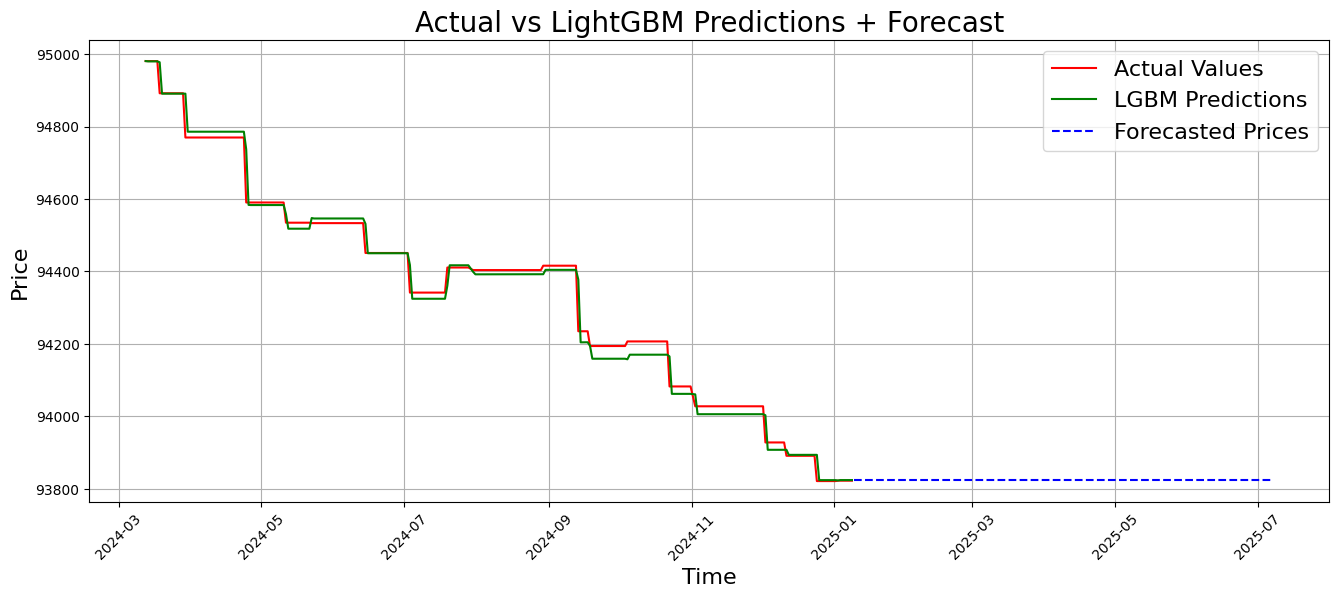

Evaluation Metrics: (17.301, 0.0, 637.526, 25.249, <Figure size 1600x600 with 1 Axes>)


In [7]:
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings("ignore")


# Load and Preprocess Data
def preprocess_data(file_path):
    # Load the CSV file
    df = pd.read_csv(file_path)

    # Filter for Bitcoin data
    df_btc = df[df["symbol"] == "BTC"]
    df_btc = df_btc.drop(columns=["symbol", "datetime"])
    df_btc = df_btc.reset_index(drop=True)
    df_btc = df_btc.rename(columns={'date': 'ds', 'price': 'y'})
    
    # Set constant time '12:00:00' for all dates
    df_btc['ds'] = pd.to_datetime(df_btc['ds']).dt.date.astype(str) + " 12:00:00"
    df_btc['ds'] = pd.to_datetime(df_btc['ds'])  # Convert back to datetime
    
    # Sort the data by 'ds'
    df_btc = df_btc.sort_values(by='ds').reset_index(drop=True)

    # Add percentage change as the target variable
    df_btc['y_pct_change'] = df_btc['y'].pct_change().fillna(0)

    # Add lagged features
    df_btc['lag_1'] = df_btc['y'].shift(1).fillna(df_btc['y'].iloc[0])
    df_btc['rolling_mean_3'] = df_btc['y'].rolling(window=3).mean().fillna(df_btc['y'].iloc[0])

    return df_btc


def LGBM_Model(df, horizon=300, forecast_horizon=180):
    # Ensure 'ds' is the index
    df = df.set_index('ds')

    # Use percentage change as the target variable
    X = df.drop(['y', 'y_pct_change'], axis=1)
    y = df['y_pct_change']

    # Train-Test Split
    X_train, X_test = X.iloc[:-horizon, :], X.iloc[-horizon:, :]
    y_train, y_test = y.iloc[:-horizon], y.iloc[-horizon:]

    # LightGBM Modeling
    lgbm = LGBMRegressor(
        random_state=42,
        n_estimators=1000,  # Increase the number of trees
        learning_rate=0.01,  # Lower learning rate for small changes
        num_leaves=31,  # Adjust tree complexity
        min_child_weight=0.1  # Focus on small changes
    )
    lgbm.fit(X_train, y_train)
    lgbm_predictions = lgbm.predict(X_test)

    # Convert predictions to pandas Series with the same index as y_test
    lgbm_predictions_series = pd.Series(lgbm_predictions, index=y_test.index)

    # Rescale predictions back to original scale
    actual_prices = df['y'].iloc[-horizon:]
    predicted_prices = actual_prices.shift(1) * (1 + lgbm_predictions_series)
    predicted_prices = predicted_prices.fillna(actual_prices.iloc[0])

    # Evaluation Metrics
    lgbm_mae = np.round(mean_absolute_error(actual_prices, predicted_prices), 3)
    lgbm_mape = np.round(mean_absolute_percentage_error(actual_prices, predicted_prices), 3)
    lgbm_mse = np.round(mean_squared_error(actual_prices, predicted_prices), 3)
    lgbm_rmse = np.round(math.sqrt(lgbm_mse), 3)

    print(f"MAE: {lgbm_mae}")
    print(f"MAPE: {lgbm_mape}")
    print(f"MSE: {lgbm_mse}")
    print(f"RMSE: {lgbm_rmse}")

    # Forecasting the next `forecast_horizon` days (30 days)
    last_known_data = df.iloc[-1].copy()
    forecast_dates = pd.date_range(df.index[-1], periods=forecast_horizon + 1, freq='D')[1:]

    forecasted_prices = []
    last_features = X.iloc[-1, :].values.reshape(1, -1)

    for i in range(forecast_horizon):
        forecast_pct_change = lgbm.predict(last_features)[0]
        forecasted_prices.append(actual_prices.iloc[-1] * (1 + forecast_pct_change))
        last_known_data['y'] = forecasted_prices[-1]  # Update the last known data
        last_known_data['y_pct_change'] = forecast_pct_change  # Update the pct_change
        last_known_data['lag_1'] = forecasted_prices[-1]  # Update lag_1 feature
        last_known_data['rolling_mean_3'] = np.mean([forecasted_prices[-1], actual_prices.iloc[-1], actual_prices.iloc[-2]])  # Update rolling mean

        # Update the features for the next prediction (Use all features, not just 'lag_1' and 'rolling_mean_3')
        last_features = last_known_data[X.columns].values.reshape(1, -1)

    forecasted_dates = pd.Series(forecast_dates, name='ds')
    forecasted_prices_series = pd.Series(forecasted_prices, name='y')

    # Plotting Actual vs Predicted + Forecast
    fig = plt.figure(figsize=(16, 6))
    plt.title('Actual vs LightGBM Predictions + Forecast', fontsize=20)
    plt.plot(actual_prices, color='red', label='Actual Values')
    plt.plot(predicted_prices, color='green', label='LGBM Predictions')
    plt.plot(forecasted_dates, forecasted_prices_series, color='blue', label='Forecasted Prices', linestyle='--')
    plt.xlabel('Time', fontsize=16)
    plt.ylabel('Price', fontsize=16)
    plt.legend(fontsize=16)
    plt.grid()
    plt.xticks(rotation=45)

    plt.show()

    return lgbm_mae, lgbm_mape, lgbm_mse, lgbm_rmse, fig



file_path = "/Users/mac/Desktop/Comapny2/CryptoPortfolioAI/artifacts/df_last_year_20250109.csv"
df_btc = preprocess_data(file_path)
lgbm_metrics = LGBM_Model(df_btc)

print("Evaluation Metrics:", lgbm_metrics)
